# Dark Money

By: Nathan Hodges


# Here is a case that is important

[Buckley_v._Valeo](https://en.wikipedia.org/wiki/Buckley_v._Valeo)

In [26]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import numpy as np

In [45]:
col_header = pd.read_csv('D:/Data/PACDataDescription.csv' , usecols = [0,1] , index_col = [0] , nrows = 27 )

#2018 PAC Data from FEC
data = pd.read_csv('D:/Data/PacData/webk18.txt',
                   delimiter = "|",
                   names = col_header.index,
                   parse_dates = ['CVG_END_DT'] )
col_header

,Field name
Column name,
CMTE_ID,Committee identification
CMTE_NM,Committee name
CMTE_TP,Committee type
CMTE_DSGN,Committee designation
CMTE_FILING_FREQ,Committee filing frequency
TTL_RECEIPTS,Total receipts
TRANS_FROM_AFF,Transfers from affiliates
INDV_CONTRIB,Contributions from individuals
OTHER_POL_CMTE_CONTRIB,Contributions from other political committees


In [46]:
directory = os.fsencode('D:/Data/PacData/')

max_receipts = []
max_date = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    data = pd.read_csv('D:/Data/PacData/' + filename ,
                       delimiter = "|" ,
                       names = col_header.index ,
                       parse_dates = ['CVG_END_DT'])
    
    receipts = data.TTL_RECEIPTS.max()
    date = data.CVG_END_DT.min()
    
    max_receipts.append(receipts)
    max_date.append(date)

dict = {'date': max_date , 'receipts': max_receipts}

df = pd.DataFrame.from_dict(dict)
df = df.set_index('date')
df = df.sort_index()


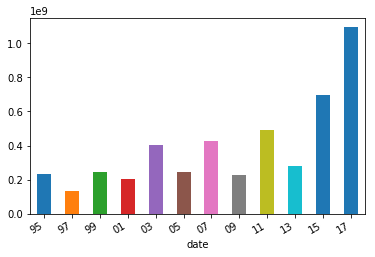

In [42]:
fig, ax = plt.subplots()

ax = df.receipts.plot(kind = 'bar')

ticklabels = [item.strftime('%y') for item in df.index]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.gcf().autofmt_xdate()

plt.show()